# Linear Regression

## The Normal Equation:

- \( y = wx + b \)
- This equation would give the optimal value of \( w \) and \( b \) for any equation.
- It is not preferable for large datasets as it will increase the complexity by about \( O(n^3) \).
- It is better than Gradient Descent when having a smaller dtaset.
aset.

In [23]:
import numpy as np

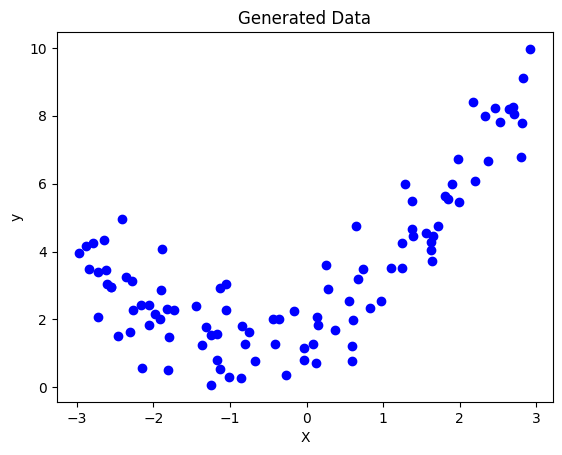

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Random values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)  # Quadratic relationship with noise

# Visualize the data
plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

In [28]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred_train=lin_reg.predict(X_train)
y_pred_test=lin_reg.predict(X_test)

In [31]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
print("R2 score of training data is: ",r2_train)
r2_test = r2_score(y_test, y_pred_test)
print("R2 score of testing data is: ",r2_test)

R2 score of training data is:  0.44419957282008815
R2 score of testing data is:  0.22516370406672126


# Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

R2 score of training data (Polynomial Regression):  0.8661321847415564
R2 score of testing data (Polynomial Regression):  0.7514605200243731


In [ ]:
# Polynomial regression model
poly_features = PolynomialFeatures(degree=10, include_bias=False)
poly_reg_model = Pipeline([
    ("poly_features", poly_features),
    ("lin_reg", LinearRegression())
])

In [ ]:
poly_reg_model.fit(X_train, y_train)

# Predictions
y_pred_train_poly = poly_reg_model.predict(X_train)
y_pred_test_poly = poly_reg_model.predict(X_test)

In [ ]:
# R2 scores
r2_train_poly = r2_score(y_train, y_pred_train_poly)
print("R2 score of training data (Polynomial Regression): ", r2_train_poly)
r2_test_poly = r2_score(y_test, y_pred_test_poly)
print("R2 score of testing data (Polynomial Regression): ", r2_test_poly)

# Regularization

In [37]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
elastic_net_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Lasso regression with GridSearchCV
lasso_reg = Lasso()
grid_search_lasso = GridSearchCV(lasso_reg, lasso_param_grid, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)
y_pred_train_lasso = grid_search_lasso.predict(X_train)
y_pred_test_lasso = grid_search_lasso.predict(X_test)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print("R2 score of training data (Lasso Regression): ", r2_train_lasso)
print("R2 score of testing data (Lasso Regression): ", r2_test_lasso)

# Ridge regression with GridSearchCV
ridge_reg = Ridge()
grid_search_ridge = GridSearchCV(ridge_reg, ridge_param_grid, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)
y_pred_train_ridge = grid_search_ridge.predict(X_train)
y_pred_test_ridge = grid_search_ridge.predict(X_test)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("R2 score of training data (Ridge Regression): ", r2_train_ridge)
print("R2 score of testing data (Ridge Regression): ", r2_test_ridge)

# Elastic Net regression with GridSearchCV
elastic_net_reg = ElasticNet()
grid_search_enet = GridSearchCV(elastic_net_reg, elastic_net_param_grid, cv=5, scoring='r2')
grid_search_enet.fit(X_train, y_train)
y_pred_train_enet = grid_search_enet.predict(X_train)
y_pred_test_enet = grid_search_enet.predict(X_test)
r2_train_enet = r2_score(y_train, y_pred_train_enet)
r2_test_enet = r2_score(y_test, y_pred_test_enet)
print("R2 score of training data (Elastic Net Regression): ", r2_train_enet)
print("R2 score of testing data (Elastic Net Regression): ", r2_test_enet)

R2 score of training data (Lasso Regression):  0.44350007109794365
R2 score of testing data (Lasso Regression):  0.23156540284382543
R2 score of training data (Ridge Regression):  0.44342492649838006
R2 score of testing data (Ridge Regression):  0.231848914770591
R2 score of training data (Elastic Net Regression):  0.4436778700515813
R2 score of testing data (Elastic Net Regression):  0.2308025509904703
